**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [0]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KDTree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import pylab as pl
from matplotlib.colors import ListedColormap
from scipy.spatial.distance import cdist


In [0]:
%matplotlib inline

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [0]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute',metric = 'euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    def fit(self, X, y):
        if(self.algorithm == 'brute'):
            self.X_tr = X
            self.y_tr = y
        elif(self.algorithm == 'kd_tree'):
            self.Ktree = KDTree(X)
            self.y_tr = y
            
    
    def predict(self, X):
        def maxy(y):
            res,count = np.unique(y,return_counts = True)
            return res[np.argmax(count)]
        funk = lambda x,y: y[x]
        if(self.algorithm == 'brute'):
            y = np.apply_along_axis(np.argpartition,1,cdist(X,self.X_tr,metric = self.metric),self.n_neighbors)[:,:self.n_neighbors]
            return np.apply_along_axis(maxy,1,np.apply_along_axis(funk,0,y,self.y_tr))
        elif(self.algorithm == 'kd_tree'):
            _,y = self.Ktree.query(X,k = self.n_neighbors)
            return np.apply_along_axis(maxy,1,np.apply_along_axis(funk,0,y,y_train))
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [0]:
iris = datasets.load_iris()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [0]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [0]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [0]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [0]:
%time clf.fit(X_train, y_train)

CPU times: user 499 µs, sys: 0 ns, total: 499 µs
Wall time: 505 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
%time my_clf.fit(X_train, y_train)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 9.3 µs


In [0]:
%time clf.predict(X_test)

CPU times: user 2.45 ms, sys: 0 ns, total: 2.45 ms
Wall time: 2.53 ms


array([0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2])

In [0]:
%time my_clf.predict(X_test)

CPU times: user 2.35 ms, sys: 879 µs, total: 3.22 ms
Wall time: 2.62 ms


array([0, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [0]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [0]:
%time clf.fit(X_train, y_train)

CPU times: user 1.98 ms, sys: 0 ns, total: 1.98 ms
Wall time: 7.92 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
%time my_clf.fit(X_train, y_train)

CPU times: user 530 µs, sys: 98 µs, total: 628 µs
Wall time: 827 µs


In [0]:
%time clf.predict(X_test)

CPU times: user 2.34 ms, sys: 879 µs, total: 3.22 ms
Wall time: 2.85 ms


array([2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1])

In [0]:
%time my_clf.predict(X_test)

CPU times: user 2.55 ms, sys: 0 ns, total: 2.55 ms
Wall time: 2.14 ms


array([2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1])

In [0]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [0]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [0]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [0]:
count_vect = CountVectorizer(min_df = 100,max_df = 0.8,stop_words = 'english')
tfid_vect = TfidfVectorizer(min_df = 100,max_df = 0.8,stop_words = 'english')#на будущее
X_train_count = count_vect.fit_transform(data)
X_train_tfid = tfid_vect.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [0]:
kf = StratifiedKFold(n_splits=3)
for train_index, test_index in kf.split(X_train_count,target):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_train_count[train_index], X_train_count[test_index]
    y_train, y_test = target[train_index], target[test_index]

TRAIN: [ 3575  3578  3609 ... 11311 11312 11313] TEST: [   0    1    2 ... 4083 4088 4095]
TRAIN: [    0     1     2 ... 11311 11312 11313] TEST: [3575 3578 3609 ... 7861 7869 7945]
TRAIN: [   0    1    2 ... 7861 7869 7945] TEST: [ 7140  7176  7193 ... 11311 11312 11313]


In [0]:
def search_optim(X,y,K,Metric):
    skf = StratifiedKFold(n_splits=3)
    accur_array = []
    for k in K:
        accur = 0
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute',
                                            metric = Metric)
            my_clf.fit(X_train.toarray(), y_train)
            my_clf_pred = my_clf.predict(X_test.toarray())
            accur+=accuracy_score(y_test, my_clf_pred)
        accur_array.append(accur/3)
    return np.argmax(np.array(accur_array)),np.array(accur_array)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [0]:
K = np.arange(1,11)

In [0]:
k1,acc_1 = search_optim(X_train_count,target,K,'euclidean')
print(k1,acc_1)

0 [0.2551709  0.22344024 0.23422385 0.23448884 0.23864272 0.23767067
 0.24129433 0.24147081 0.23864263 0.23943792]


In [0]:
k2,acc_2 = search_optim(X_train_count,target,K,'cosine')
print(k2,acc_2)

9 [0.37360825 0.35195297 0.3738724  0.39137261 0.39853144 0.40940375
 0.41585568 0.42160095 0.42381043 0.42849539]


In [0]:
k3,acc_3 = search_optim(X_train_tfid,target,K,'euclidean')
print(k3,acc_3)

0 [0.18667164 0.13098799 0.14071076 0.1354075  0.12966246 0.12524309
 0.1234758  0.12117749 0.11790748 0.11693508]


In [0]:
k4,acc_4 = search_optim(X_train_tfid,target,K,'cosine')
print(k4,acc_4)

9 [0.40648841 0.3864237  0.40754848 0.42955621 0.44475912 0.45368606
 0.45996198 0.46455754 0.46862336 0.47145168]


## Графики


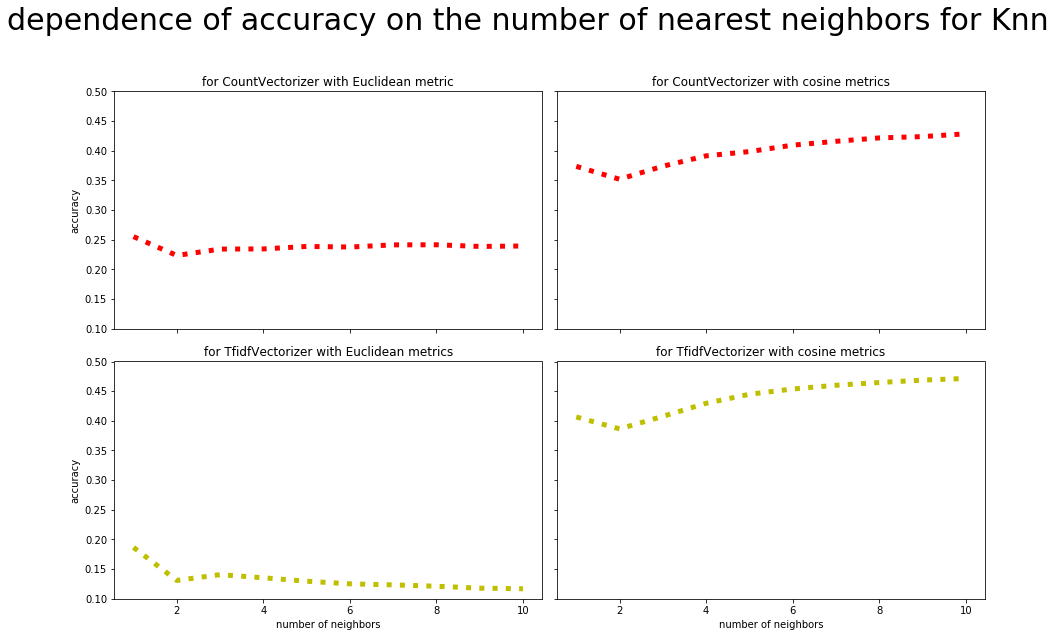

In [0]:
ymin,ymax = 0.1,0.5
fig,axes = plt.subplots(2,2,figsize = (13,8),sharex=True, sharey=True)
fig.suptitle('dependence of accuracy on the number of nearest neighbors for Knn',
             y = 1.1,
             fontsize = 30)
axes[0,0].plot(K,acc_1,'r',linestyle = ':',linewidth = 5)
axes[0,1].plot(K,acc_2,'r',linestyle = ':',linewidth = 5)
axes[1,0].plot(K,acc_3,'y',linestyle = ':',linewidth = 5)
axes[1,1].plot(K,acc_4,'y',linestyle = ':',linewidth = 5)
axes[0,0].set_title('for CountVectorizer with Euclidean metric')
axes[0,1].set_title('for CountVectorizer with cosine metrics')
axes[1,1].set_title('for TfidfVectorizer with cosine metrics')
axes[1,0].set_title('for TfidfVectorizer with Euclidean metrics')
axes[0,0].set_ylim(ymin,ymax)
axes[1,0].set_ylim(ymin,ymax)
axes[0,1].set_ylim(ymin,ymax)
axes[1,1].set_ylim(ymin,ymax)
axes[0,0].set_ylabel('accuracy')
axes[1,0].set_ylabel('accuracy')
axes[1,0].set_xlabel('number of neighbors')
axes[1,1].set_xlabel('number of neighbors')
fig.tight_layout()
fig.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [0]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [0]:
test_data = newsgroups['data']
test_target = newsgroups['target']

In [0]:
X_test_tfid = tfid_vect.transform(test_data)

In [0]:
my_clf = MyKNeighborsClassifier(n_neighbors=k4+1, algorithm='brute',
                                metric='cosine')
my_clf.fit(X_train_tfid.toarray(), target)
my_clf_pred = my_clf.predict(X_test_tfid.toarray())
accuracy_score(test_target, my_clf_pred)

0.4179500796601168

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

## Итоги

- Для анализа текста в случае применения метода Knn лучше оказалось применять Tfidf векторизацию тк нам важно значимость слов,  а не просто их присутсвие  
- Косинусная метрика оказалась лучше евклидовой, так как она она показывает нам схожесть текстов, а не расстояние между ними, в случае евклидовой метрики   
- Легко заметить, что в случае евклидовой метрики наилучшим количеством соседей является - наименьшее их количество, а в косинусной при к>2 она только растет - думаю это связано с тем, что в случае 1-й метрики новые ближайшие соседи начинали портить прогноз, тк они могли быть схожими из-за большого количества совпадающих слов, хотя смысловые их части могли отличаться, а в случае второй - мы выбирали наиближайшими именно 'схожие' тексты, за счет чего, при увеличении количество влияющих соседей, наш алгоритм лучше предсказывал категорию текста. Я уверен, что при увеличении к до 20, а может и больше, точность бы продолжала расти(проверял для к = 20, дествительно стала выше - 0.446, для к = 30 точность - 0.46, для к = 40 - 0.467,к = 50 - 0.468, даже для к = 100 точность растет и равняется = 0.49)  
- Точность получилась ниже, чем была на кросс валидации, но не сильно - это можно обосновать тем, что  в тестовой выборке появились тексты с новыми значивыми словами, которых небыло в нашей тренировочной выборке,считаю, что немного неверное ограничение частот нашего словаря повлияло пагубно на репрезентативность выборки, так-же стоит заметить, что почти наверное наша выборка текстов не покрывает все возможные тексты данных категорий, тем самым - получить 100 процентную точность в случае использования любого алгоритма, скорее всего не получиться, так как мы не можем состоятельно оценить распределение генеральной совокупности  
- Считаю, что низкая точность вообще вышла из-за:  
1) Линейности весов и непараметричности нашего алгоритма, при огромной размерности векторов-признаков наших текстов. Скорее всего, если бы были взяты нелинейные веса - точность бы выросла  
2) Вектора признаков имеют размерность 1336, при количестве в 11314 - это означает их линейную зависимость, которая делает апроксимируемое распределение не однозначным  
3) классы в обучающей выборке предствалены не равнозначно, например: наиболее часто встречаемый класс - 10, имеет 600 представителей, в то время, как 19 - всего 377, что делает вероятность верного предсказания 19-го класса существенно ниже, чем 10(при к =20, косинусной мерой и Tfidf векторизацией с тем-же набором параметров разница в точности предсказания между этими классами калоссальна: 0.662 против 0.08)    
- Поолжительно же повлияла на наши предсказания разряженность матрицы наших текстов.